<a href="https://colab.research.google.com/github/geonextgis/PyTorch-for-Deep-Learning-and-Machine-Learning/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Classification with PyTorch**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/PyTorch_logo_black.svg/2560px-PyTorch_logo_black.svg.png" width="20%">

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the outputs).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import requests
from pathlib import Path

plt.rcParams["font.family"] = "DeJavu Serif"
plt.rcParams["font.serif"] = "Times New Roman"

import warnings
warnings.filterwarnings("ignore")

torch.__version__

'2.4.1+cu121'

## **1. Make Classification Data and Get Ready**

In [2]:
# Make 1000 samples
n_samples =1000

# Create circles
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [4]:
# Make DataFrame of circle data
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
print(circles.shape)
circles.head()

(1000, 3)


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


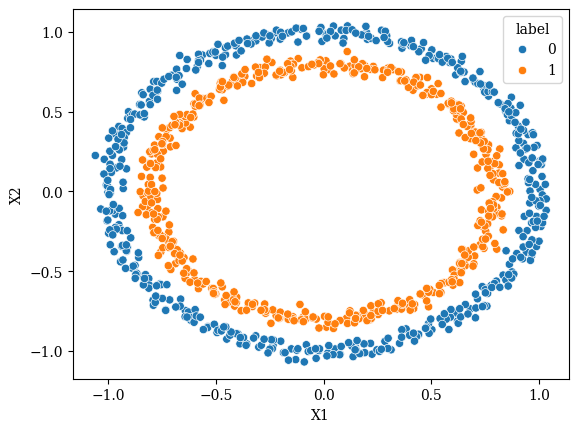

In [5]:
# Visualize, visualize, visualize
sns.scatterplot(data=circles, x="X1", y="X2", hue="label");

**Note:** The data we're working is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### **1.1 Check Input and Output Shapes**

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# View the first sample example features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### **1.2 Turn Data into Tensors and Create Train and Test Splits**

In [8]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## **2. Building a Model**

Let's build a model to classify our blue and orange dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [11]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup device agnostic code, let's create a model that:
1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling that shapes of our data.
3. Defines a `foward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target `device`

In [12]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handing the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single features (same shape as y)

        # self.two_linear_layers = nn.Sequential(
        #     nn.Linear(in_features=2, out_features=5),
        #     nn.Linear(in_features=5, out_features=1)
        # )

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, X):
        return self.layer_2(self.layer_1(X)) # X -> layer_1 -> layer_2 -> output
        # return self.two_linear_layers(X)

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [13]:
device

'cuda'

In [14]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [15]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6614,  0.1359],
                      [-0.3300,  0.2113],
                      [-0.4568,  0.2063],
                      [-0.2932,  0.5629],
                      [ 0.3440, -0.5910]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.5007, -0.1660, -0.6668,  0.4626, -0.3087], device='cuda:0')),
             ('1.weight',
              tensor([[-0.4436,  0.1506, -0.3788, -0.2700,  0.2305]], device='cuda:0')),
             ('1.bias', tensor([0.2065], device='cuda:0'))])

In [17]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [-0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [18]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### **2.1 Setup Loss Functions and Optimizer**
Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (Mean Absolute Error or Mean Squared Error).

For classification you might want binary cross entropy or categorical cross entropy (cross entropy).

As a reminder, the loss function measures how wrong your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in optins.

* For the loss function we're going to use `totch.nn.BCEWithLogitLoss()`.
* For different optimizers see `torch.optim`

In [19]:
# Setup the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires input to have gone through the sigmoid  activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitloss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [20]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

## **3. Train Model**
To train our model, we're going to need to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### **3.1 Going from raw logits -> prediction probabilities -> prediction labels**

Our model outputs are going to be raw **logits**.

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [21]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.2492],
        [-0.3632],
        [ 0.1483],
        [-0.3622],
        [ 0.3048]], device='cuda:0')

In [22]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [23]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4380],
        [0.4102],
        [0.5370],
        [0.4104],
        [0.5756]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [24]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [25]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### **3.2 Building a Training and Testing Loop**

In [26]:
# Set the manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
    #                y_train)
    loss = loss_fn(y_logits, # nn.BCEWithLogitLoss expects raw logits as input
                   y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

        # Print out what's happenin
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70329, Acc: 49.25% | Test loss: 0.69259, Test acc: 53.50%
Epoch: 10 | Loss: 0.70122, Acc: 49.25% | Test loss: 0.69171, Test acc: 53.50%
Epoch: 20 | Loss: 0.69971, Acc: 49.38% | Test loss: 0.69117, Test acc: 54.00%
Epoch: 30 | Loss: 0.69858, Acc: 49.62% | Test loss: 0.69086, Test acc: 53.50%
Epoch: 40 | Loss: 0.69771, Acc: 49.38% | Test loss: 0.69069, Test acc: 54.00%
Epoch: 50 | Loss: 0.69702, Acc: 49.12% | Test loss: 0.69062, Test acc: 54.50%
Epoch: 60 | Loss: 0.69647, Acc: 48.88% | Test loss: 0.69062, Test acc: 54.50%
Epoch: 70 | Loss: 0.69602, Acc: 49.25% | Test loss: 0.69065, Test acc: 54.00%
Epoch: 80 | Loss: 0.69565, Acc: 49.12% | Test loss: 0.69071, Test acc: 54.50%
Epoch: 90 | Loss: 0.69534, Acc: 49.12% | Test loss: 0.69080, Test acc: 53.50%


## **4. Make Predictions and Evaluate the Model**
From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

In othre words, "Visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()`

In [27]:
# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

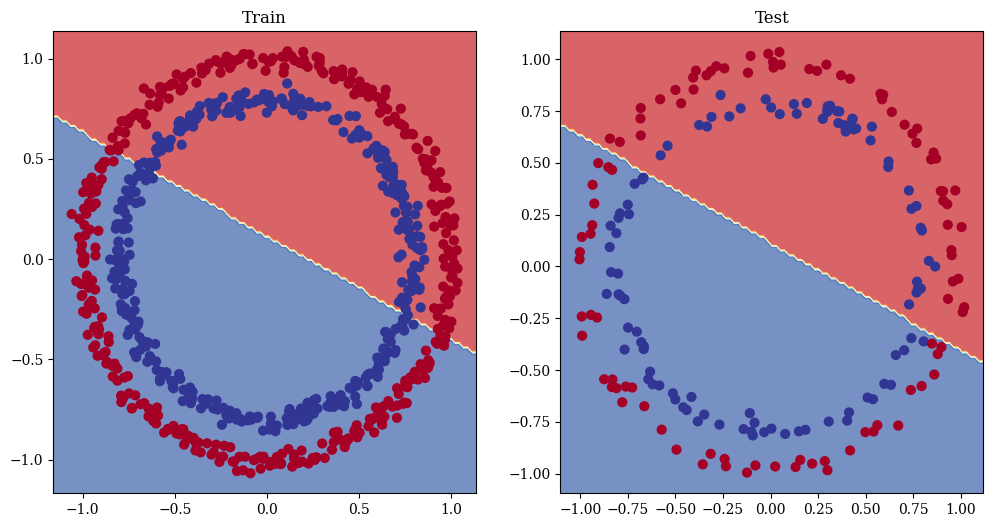

In [28]:
# Plot the decision boundary of the model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## **5. Improving a Model (from a Model Perspective)**

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And beacuse these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [29]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, X):
        # z = self.layer_1(X)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(X))) # this way of writing operations leverages speed ups where possible behind the scene

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [30]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [31]:
# write a training and evaluation loop for model_1
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # Set the model in training model

    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss
    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Perform gradient descent
    optimizer.step()

    ### Testing
    with torch.inference_mode():
        model_1.eval() # Set the model the the eval mode

        # Forward pass
        test_logits = model_1(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        # Calculate test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

        # Print out what's happening
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 100 | Loss: 0.69305 | Acc: 50.38% | Test Loss: 0.69379 | Test Acc: 48.00%
Epoch: 200 | Loss: 0.69299 | Acc: 51.12% | Test Loss: 0.69437 | Test Acc: 46.00%
Epoch: 300 | Loss: 0.69298 | Acc: 51.62% | Test Loss: 0.69458 | Test Acc: 45.00%
Epoch: 400 | Loss: 0.69298 | Acc: 51.12% | Test Loss: 0.69465 | Test Acc: 46.00%
Epoch: 500 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69467 | Test Acc: 46.00%
Epoch: 600 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 700 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 800 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 900 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%


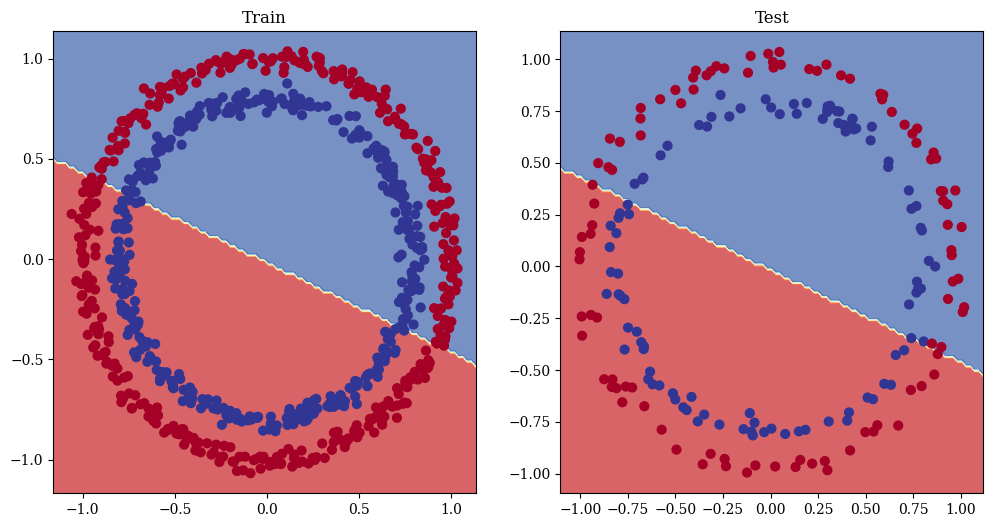

In [32]:
# Plot the decision boundary of the model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### **5.1 Preparing Data to See if Our Model can Fit a Straight Line**

One way to troubleshoot to a larger problem is to test out a smaller problem.

In [33]:
# Create some data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [34]:
# Create train and test splits
train_split = int(len(X_regression) * 0.8)
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

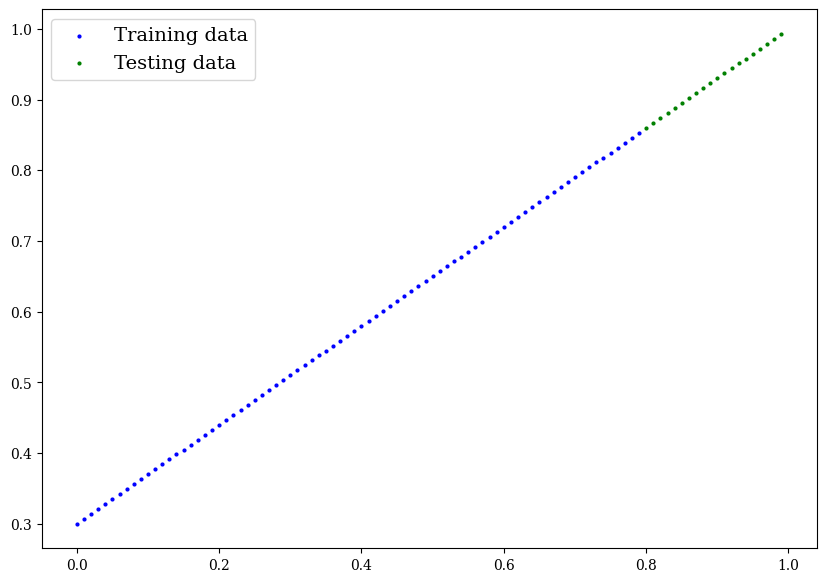

In [35]:
# Plot the data
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### **5.2 Adjusting `model_1` to Fit a Straight Line**

In [36]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [37]:
# Loss and Optimizer
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [38]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

### Training
for epoch in range(epochs):
    model_2.train()

    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Perform gradient descent
    optimizer.step()

    ### Testing
    model_2.eval()

    with torch.inference_mode():
        test_preds = model_2(X_test_regression)

    test_loss = loss_fn(test_preds, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")

Epoch: 0 | Loss: 0.5790 | Test Loss: 0.8227
Epoch: 100 | Loss: 0.0350 | Test Loss: 0.0016
Epoch: 200 | Loss: 0.0327 | Test Loss: 0.0033
Epoch: 300 | Loss: 0.0294 | Test Loss: 0.0045
Epoch: 400 | Loss: 0.0273 | Test Loss: 0.0057
Epoch: 500 | Loss: 0.0267 | Test Loss: 0.0053
Epoch: 600 | Loss: 0.0263 | Test Loss: 0.0051
Epoch: 700 | Loss: 0.0259 | Test Loss: 0.0050
Epoch: 800 | Loss: 0.0248 | Test Loss: 0.0039
Epoch: 900 | Loss: 0.0233 | Test Loss: 0.0046


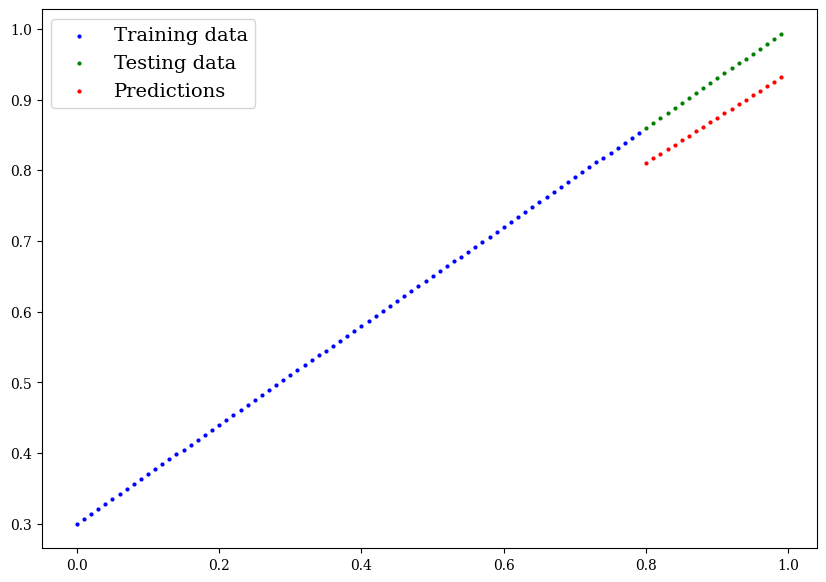

In [39]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## **6. The Missing Piece: Non-Linearity**

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) or linear and non-linear functions?

### **6.1 Recreating Non-Linear Data (Orange and Blue Circles)**

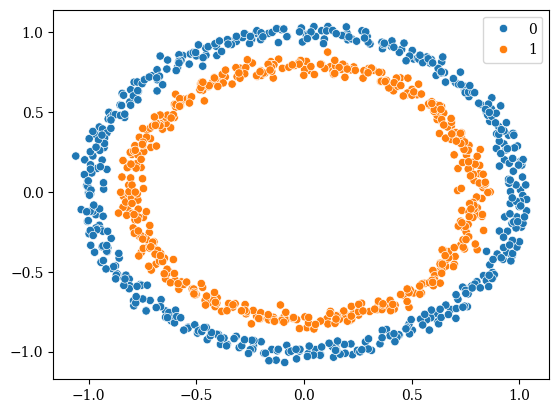

In [40]:
# Make and plot data
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y);

In [41]:
# Convert data to tensors and then to train and test splits
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### **6.2 Building a Model with Non-Linearity**
* Linear = Straight Line
* Non-Linear = Non-Straight Lines

Artifical neural networks are a large combination of linear (straight) amd non-straight (non-linear) functions which are potentiallly able to find patterns in the data.

In [42]:
# Build a model with non-linear activation function
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # relu is a non-linear activation function

    def forward(self, X):
        # Where should we put our non-linear activation functions?
        return self.layer_3(self.relu(self.layer_2(self.layer_1(X))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [43]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

### **6.3 Train a Model with Non-Linearity**

In [44]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all the data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
epochs = 1000

for epoch in range(epochs):
    ### Training
    model_3.train()

    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss
    loss = loss_fn(y_logits,
                   y_train)

    acc = accuracy_fn(y_train, y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Perform gradient descent
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_preds)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6983 | Acc: 50.00% | Test Loss: 0.6986 | Test Acc: 49.00%
Epoch: 100 | Loss: 0.6929 | Acc: 50.88% | Test Loss: 0.6941 | Test Acc: 47.00%
Epoch: 200 | Loss: 0.6901 | Acc: 53.37% | Test Loss: 0.6914 | Test Acc: 50.00%
Epoch: 300 | Loss: 0.6876 | Acc: 56.62% | Test Loss: 0.6883 | Test Acc: 55.00%
Epoch: 400 | Loss: 0.6847 | Acc: 60.00% | Test Loss: 0.6847 | Test Acc: 61.00%
Epoch: 500 | Loss: 0.6799 | Acc: 56.00% | Test Loss: 0.6789 | Test Acc: 60.50%
Epoch: 600 | Loss: 0.6728 | Acc: 56.00% | Test Loss: 0.6718 | Test Acc: 60.50%
Epoch: 700 | Loss: 0.6630 | Acc: 64.50% | Test Loss: 0.6645 | Test Acc: 65.00%
Epoch: 800 | Loss: 0.6471 | Acc: 74.12% | Test Loss: 0.6530 | Test Acc: 71.50%
Epoch: 900 | Loss: 0.6218 | Acc: 81.62% | Test Loss: 0.6324 | Test Acc: 78.00%


### **6.4 Evaluating a Model Trained with Non-Linear Activation Functions**

In [45]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test).squeeze()))

y_preds[:10], y_test[:10]

(tensor([1., 1., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

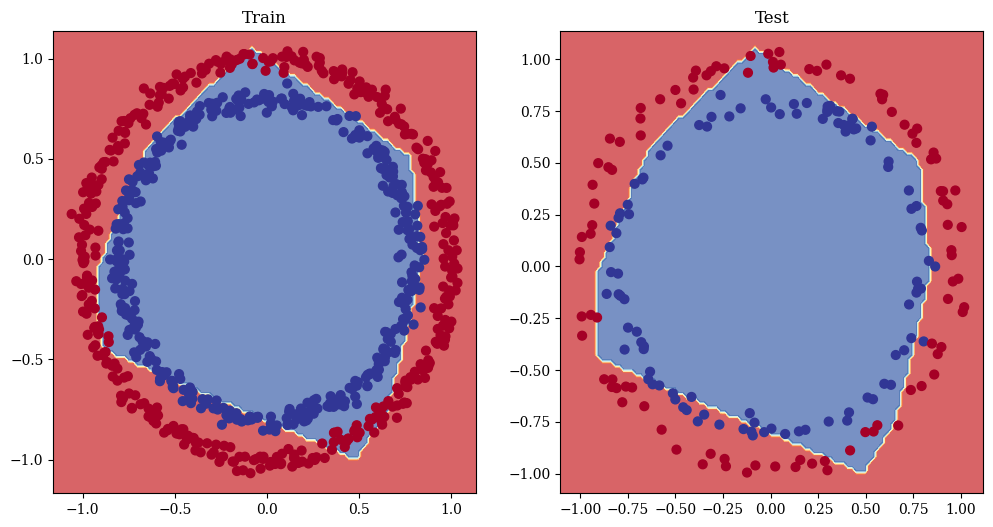

In [46]:
# Plot the decision boundaries
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## **7. Relicating Non-Linear Activation Functions**

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in the data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions.

In [47]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

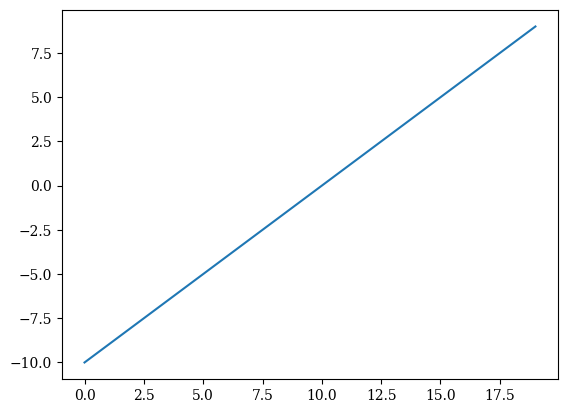

In [48]:
# Visualize the tensor
plt.plot(A);

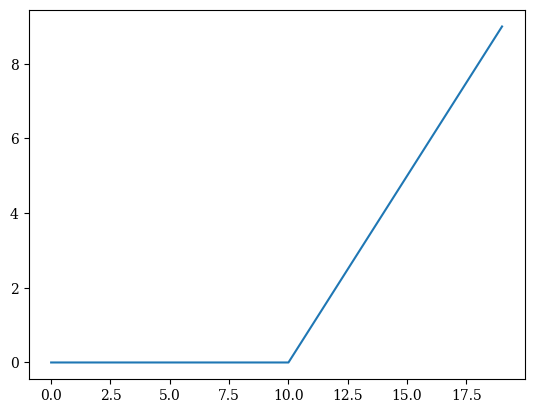

In [49]:
plt.plot(torch.relu(A));

In [50]:
def relu(X: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), X) # input must be a tensor

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

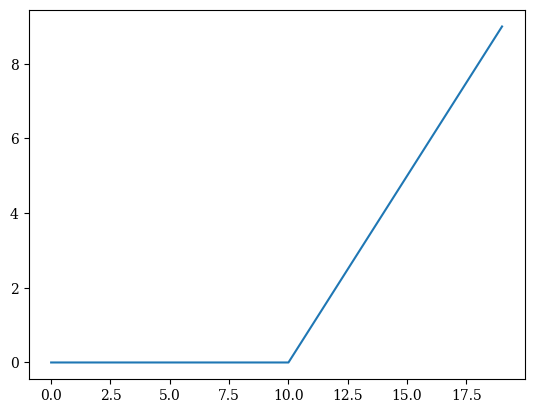

In [51]:
# Plot ReLU activation function
plt.plot(relu(A));

In [52]:
# Now let's do the same for sigmoid
def sigmoid(X: torch.Tensor) -> torch.Tensor:
    return 1 / (1 + torch.exp(-X))

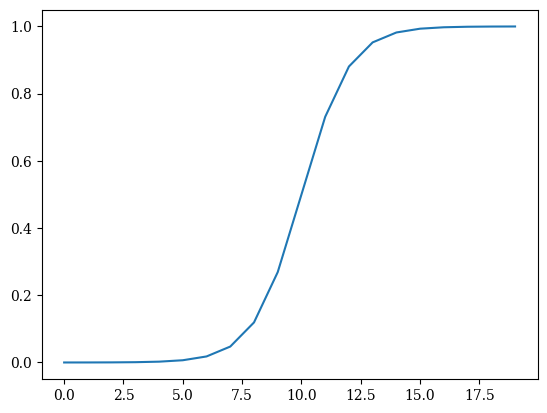

In [53]:
plt.plot(torch.sigmoid(A));

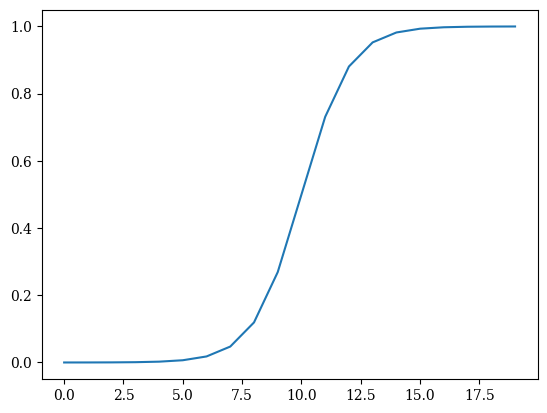

In [54]:
plt.plot(sigmoid(A));

## **8. Putting it all Together with a Multi-Class Classification Problem**
* Binary Classification = One thing or another (cat vs. dog, spam vs. not spam, fraud or not fraud)
* Multi-class classification = More than one thing or another (cat vs. dog vs. chicken)

### **8.1 Creating a Toy Multi-Class Dataset**

In [55]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import torch
from torch import nn

plt.rcParams["font.family"] = "DeJavu Serif"
plt.rcParams["font.serif"] = "Times New Roman"

torch.__version__

'2.4.1+cu121'

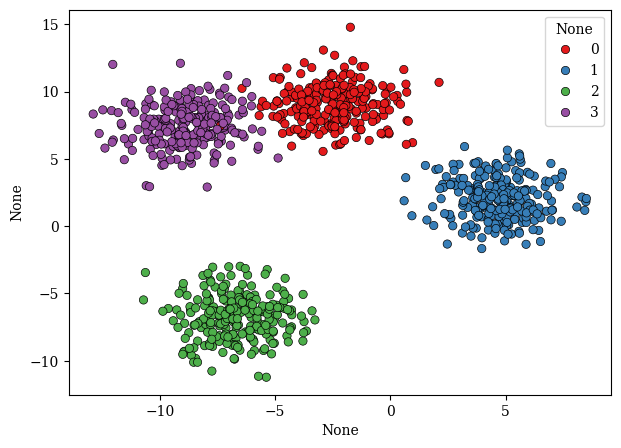

In [93]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split the data into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data (visualize, visualize, visualize)
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_blob[:, 0], y=X_blob[:, 1], hue=y_blob, palette="Set1", edgecolor="k");

### **8.2 Building a Multi-Class Classification Model in PyTorch**

In [110]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [122]:
# Build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes multi-class classification model.

        Args:
            input_features (int): Number of input features to the model
            output_features (int): Number of output features (number of output classes)
            hidden units (int): Number of hidden units between layers, default 8

        Returns:

        Example:
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, X):
        return self.linear_layer_stack(X)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### **8.3 Create a Loss Function and Optimizer for a Multi-Class Classification Model**

In [123]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) # learning rate is a hyperparameters you can change

### **8.4 Getting Prediction Probabilities for a Multi-Class Pytorch Model**

In order to evaluate and train and test our model, we need to convert our model's output (logits) to prediction probabilties and then to predcition labels.

Logits (raw output of the model) -> Pred probs (use torch.softmax) -> Pred labels (take the argmax of the prediction probabilities)

In [124]:
# Put the data on the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [125]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [126]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [127]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [128]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

### **8.5 Creating a Training Loop and Testing Loop for a Multi-Class Classification**

In [129]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # 2. Calculate the loss
    loss = loss_fn(y_logits,
                   y_blob_train)

    acc = accuracy_fn(y_blob_train,
                      y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Perform gradient descent
    optimizer.step()

    ### Testing
    model_4.eval()

    # Forward pass
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

        # Calculate the loss and accuracy
        test_loss = loss_fn(test_logits,
                            y_blob_test)

        test_acc = accuracy_fn(y_blob_test, test_preds)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Train Loss: 1.1588, Acc: 40.38% | Test Loss: 1.0755, Test Acc: 48.00%
Epoch: 10 | Train Loss: 0.6448, Acc: 96.75% | Test Loss: 0.6607, Test Acc: 97.50%
Epoch: 20 | Train Loss: 0.4254, Acc: 98.50% | Test Loss: 0.4307, Test Acc: 100.00%
Epoch: 30 | Train Loss: 0.2529, Acc: 99.12% | Test Loss: 0.2451, Test Acc: 99.50%
Epoch: 40 | Train Loss: 0.1123, Acc: 99.25% | Test Loss: 0.1023, Test Acc: 99.50%
Epoch: 50 | Train Loss: 0.0663, Acc: 99.25% | Test Loss: 0.0585, Test Acc: 99.50%
Epoch: 60 | Train Loss: 0.0507, Acc: 99.25% | Test Loss: 0.0429, Test Acc: 99.50%
Epoch: 70 | Train Loss: 0.0430, Acc: 99.25% | Test Loss: 0.0349, Test Acc: 99.50%
Epoch: 80 | Train Loss: 0.0384, Acc: 99.25% | Test Loss: 0.0299, Test Acc: 99.50%
Epoch: 90 | Train Loss: 0.0352, Acc: 99.25% | Test Loss: 0.0266, Test Acc: 99.50%


### **8.6 Making and Evaluating Predictions with a PyTorch Multi-Class Model**

In [130]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1) # Logits -> Probabilities -> Class

# View the first 10 predictions
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [131]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

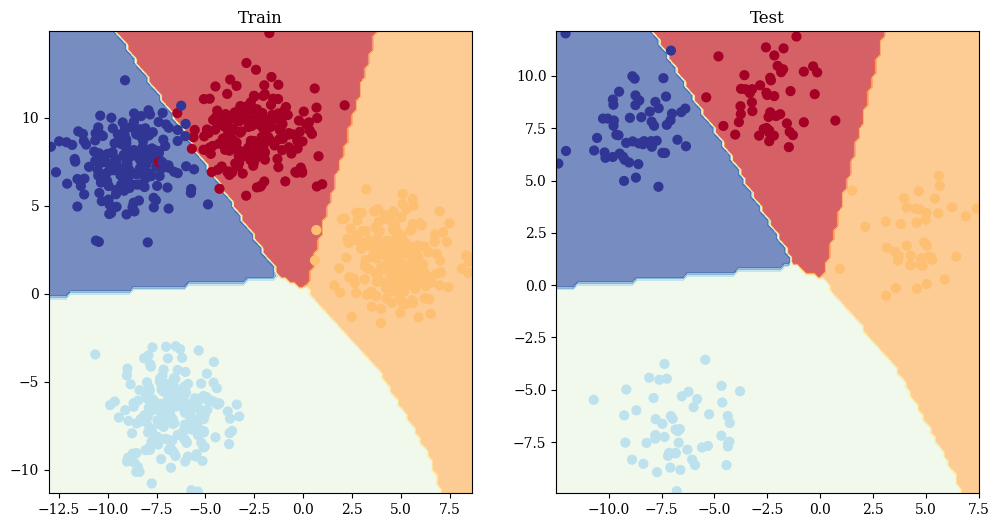

In [132]:
# Plot the decision boundary
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## **9. A Few More Classification Metrics... (to Evaluate our Classification Model)**

* Accuracy: out of 100 samples, how many does our model get right?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

If you want access to a lot of PyTorch metrics, see TorchMetrics - https://lightning.ai/docs/torchmetrics/stable/

In [ ]:
!pip install torchmetrics

In [136]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')